In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
np.random.seed(0)
random.seed(0)

<Figure size 640x480 with 0 Axes>

In [3]:
## leemos el conjunto de datos

df = pd.read_csv('loan.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [4]:
##  transformar la columna loan status a 0 y 1.

df['loan_status'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)

df_raw = df.copy()

In [5]:
## de entrada se elimjian estas que el usario no conoce cuando se inicia el prestamo y otras no aportan información relevante

df = df.drop(labels=['total_pymnt','total_pymnt_inv', 'out_prncp','out_prncp_inv', 'funded_amnt_inv',
                   'funded_amnt', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
                   'collection_recovery_fee', 'last_pymnt_amnt', 'total_rec_int', 'last_credit_pull_d', 'url', 'member_id', 'policy_code', 'last_pymnt_d','desc', 'title','zip_code', 'addr_state','id'], axis=1)





In [6]:


## variables con más del 20%  de datos faltantes no se consideran

total_na=df.isna().sum()
# Identificar las columnas con más del 20% de valores nulos
missing_values = df.isnull().mean()
columns_to_drop = missing_values[missing_values > 0.2].index
df = df.drop(columns=columns_to_drop)
print(missing_values)
print("To drop:")
print(columns_to_drop)









loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057993
emp_length                     0.050514
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000033
earliest_cr_line               0.000033
inq_last_6mths                 0.000033
mths_since_last_delinq         0.511971
mths_since_last_record         0.845553
open_acc                       0.000033
pub_rec                        0.000033
revol_bal                      0.000000
revol_util                     0.000566


La columna eliminada más cercana al umbral de eliminación es next_pymnt_d que es es la próxima fecha de pago, una variable que no aportaría en el target del modelo así y que las demás variables a eliminar poseen demasiados datos faltantes. Por estas razones se considera que depurar estos datos es una buena estrategia que no afectaría al modelo.

In [7]:
df.head() ## van 30 columnas

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,13648.0,83.7,9.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1687.0,9.4,4.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,2956.0,98.5,10.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,5598.0,21.0,37.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,27783.0,53.9,38.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


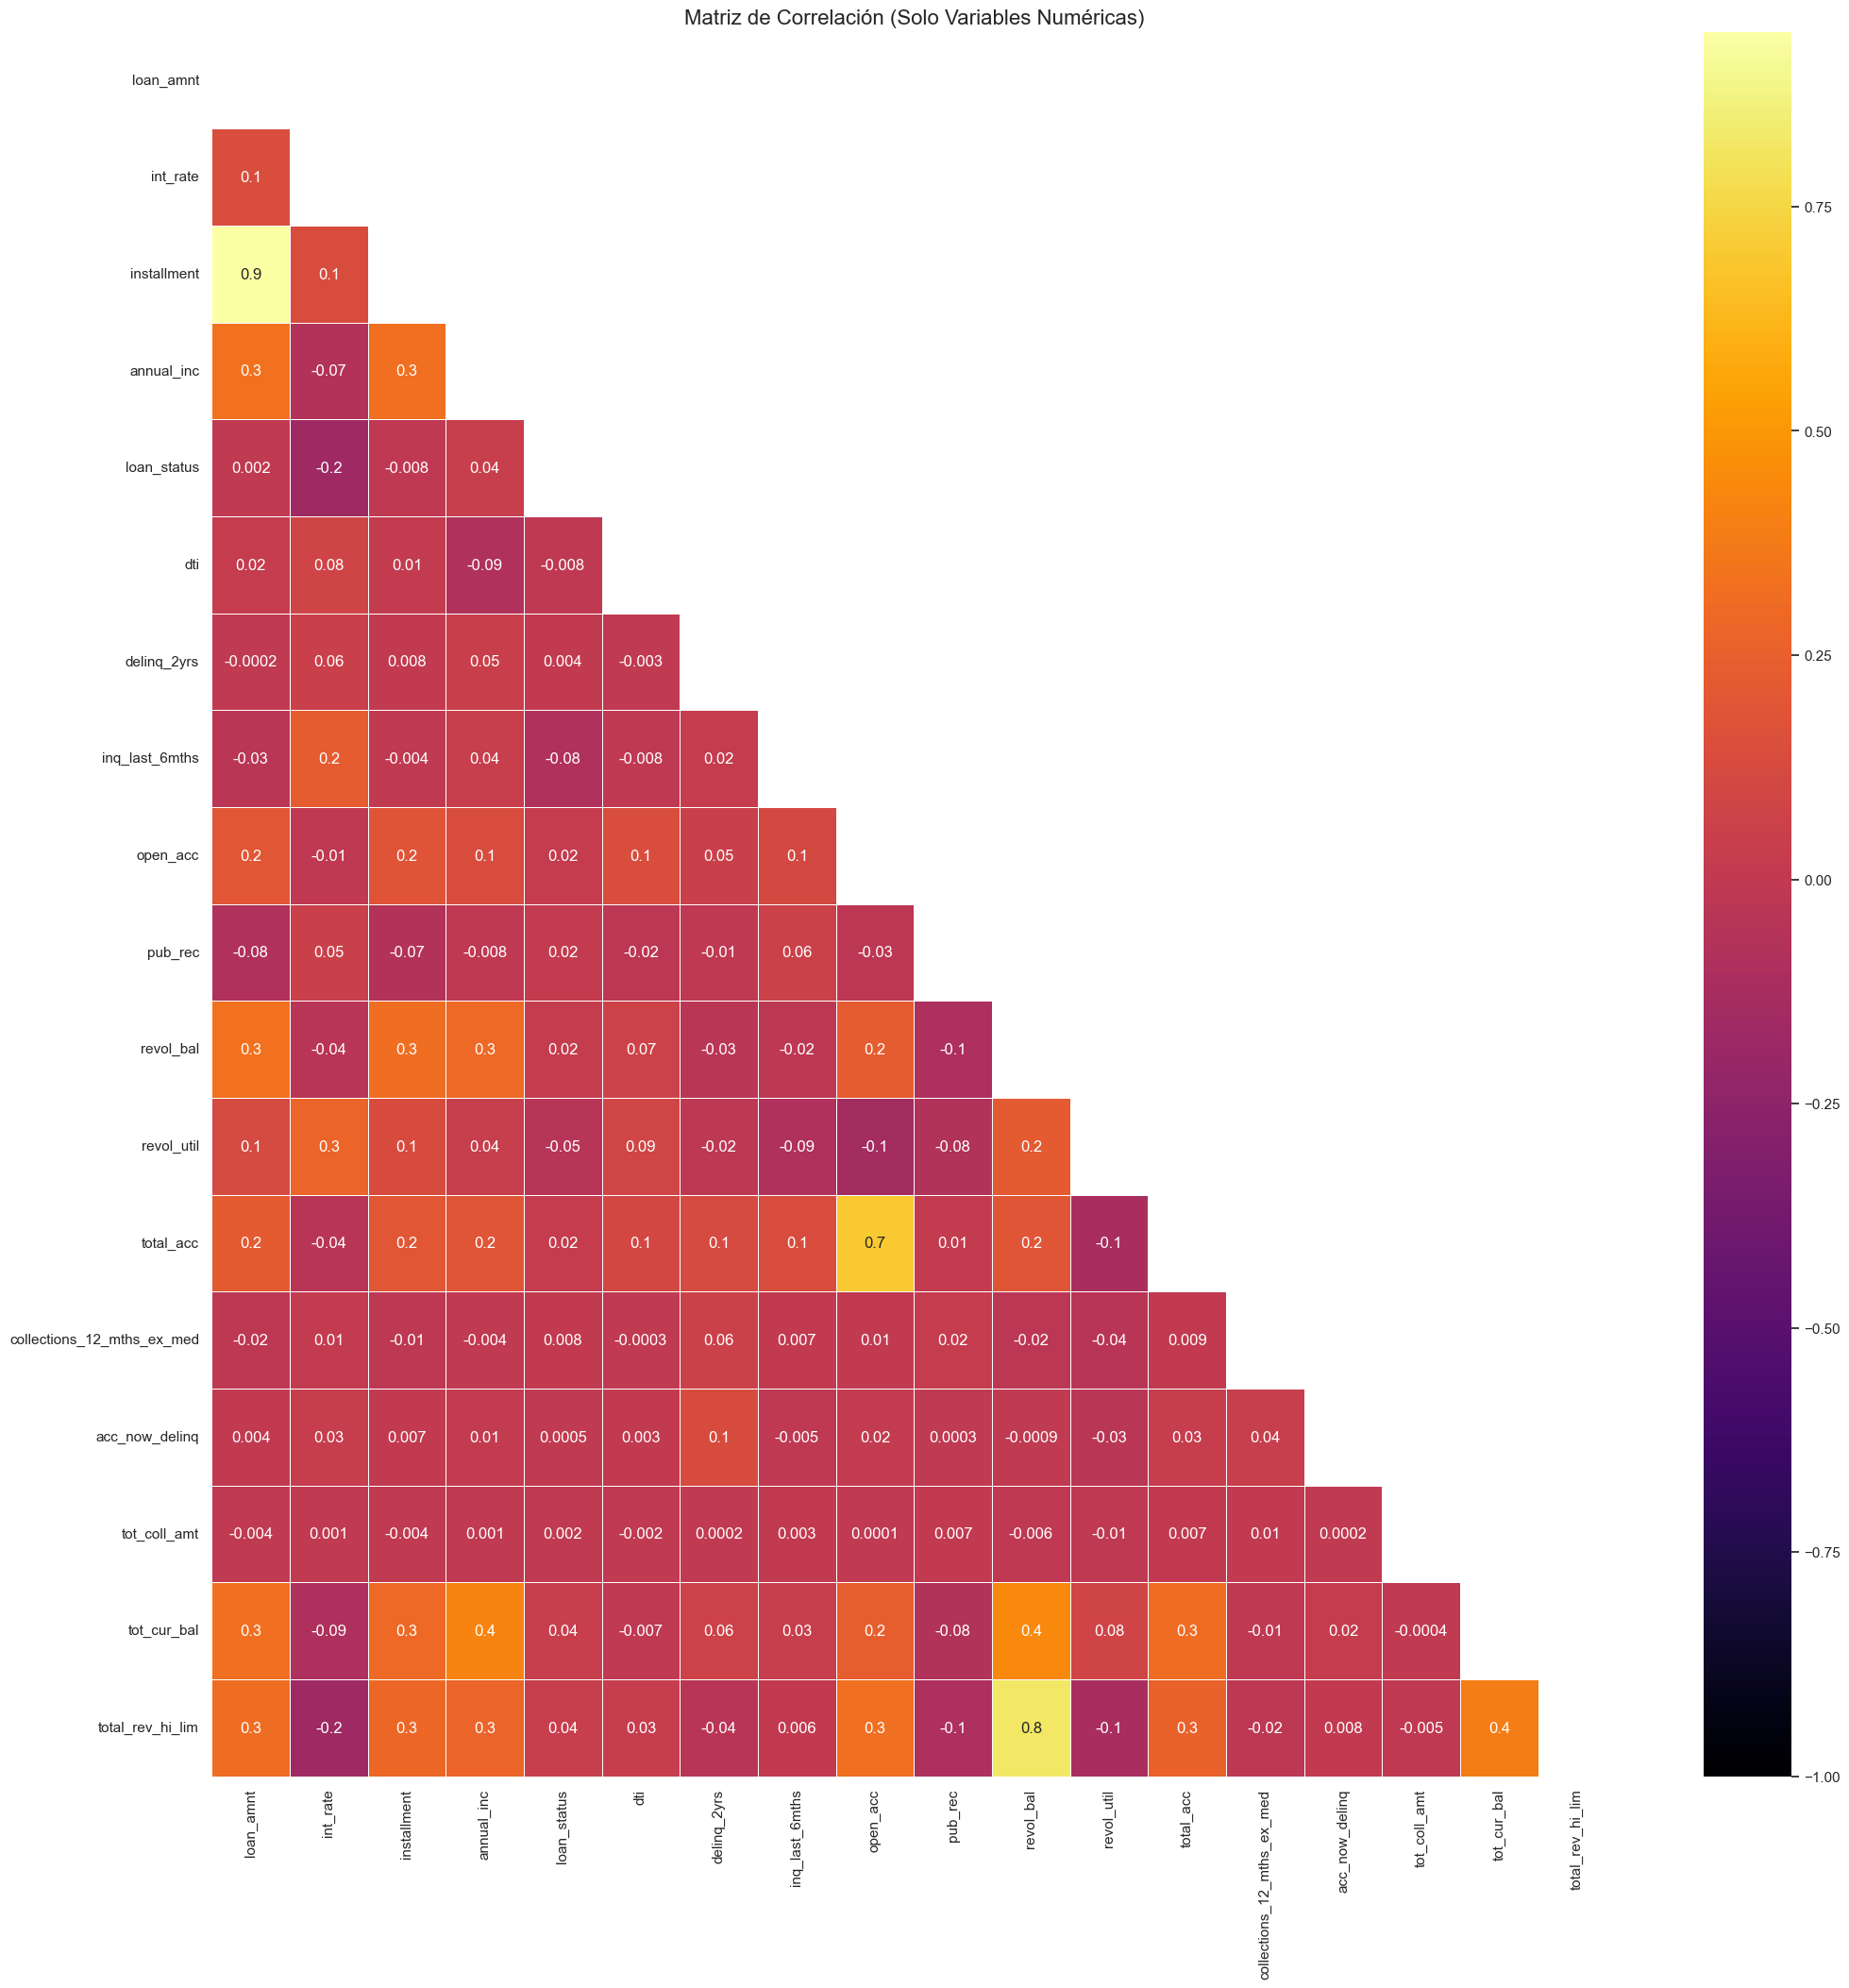

In [8]:

## matriz de correlaciones
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Crear la matriz de correlación
corr_matrix = df_numeric.corr().fillna(0)

# Crear una máscara para ocultar la parte superior del mapa de calor
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Graficar el mapa de calor
plt.figure(figsize=(24, 24))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="inferno",
    vmin=-1,
    fmt='.1g',
    edgecolor='w',
    linewidth=0.6
)
plt.title('Matriz de Correlación (Solo Variables Numéricas)', fontsize=16)
plt.show()


se eliminarán aquellas columnas que posean un correlación de al menos 60% y se dejará aquella que tenga más correlación con el target es decir las variables:

In [9]:
 # se eliminarán aquellas columnas que posean un correlación de al menos 60% es decir las variables:



df.drop(columns=['total_acc', 'total_rev_hi_lim'], inplace=True)

In [10]:
df.shape ## ahora quedan 29 columnas

(887379, 29)

In [11]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal'],
      dtype='object')


In [12]:

df.drop(columns=['earliest_cr_line', 'issue_d','initial_list_status'], inplace=True)

In [13]:
df.shape

(887379, 26)

In [14]:
## Rellenar los valores en los que los clientes no especificaron su trabajo pero si el tiempo en el

print("Categorías diferentes:", df["emp_title"].nunique())
print("Numero de N/A:", df["emp_title"].isna().sum())
print("Numero de clientes que clientes no especificaron su trabajo pero si el tiempo en el:",
      df[(df['emp_length'].notnull()) & (df['emp_title'].isnull())].shape[0])

# Imputarles la expresion off the books que es trabajo informal o no oficial
df['emp_title'] = df.apply(lambda row: 'off the books' if pd.notnull(row['emp_length']) and pd.isnull(row['emp_title']) else row['emp_title'], axis=1)

Categorías diferentes: 299271
Numero de N/A: 51462
Numero de clientes que clientes no especificaron su trabajo pero si el tiempo en el: 7026


Verificar que aquellos valores nulos de aquellos que no especificaron el trabajo posiblemente tengan valores nulos en el "emp_lenght" y la razón sea porque no trabajan.

In [15]:
df["emp_title"] = df["emp_title"].fillna("Does not work")
no_trabajan = df[df["emp_title"]=="Does not work"]["emp_length"]
no_trabajan.shape
print(no_trabajan.value_counts())
print("Numero de datos N/A en aquellos que no trabajan", no_trabajan.isna().sum())
print("Numero de datos que no trabajan y tienen en su experiencia un valor diferente de nulo",
      no_trabajan[no_trabajan.notnull()].shape[0])

Series([], Name: count, dtype: int64)
Numero de datos N/A en aquellos que no trabajan 44436
Numero de datos que no trabajan y tienen en su experiencia un valor diferente de nulo 0


Como se confirmó el comportamiento que estabamos prediciendo en los datos podemos seguir y procesar la columna de experiencia y aplicarles el valor de -1 a los clientes que no trabajan para diferenciar y en caso de que el modelo encuentre una correlación positiva entre esta columna y el target penalizar un poco estos clientes.

Hacer una copia de la columna del trabajo para analisis posterior(creación de embeddings) , y se elimina de el dataframe original debido que si se realizara un one-hot incrementaría demasiado la dimensionalidad del problema.

In [16]:
emp_title =df["emp_title"].copy()
df.drop(columns=['emp_title'], inplace=True)

In [17]:
# convertir a numerica la columna emp_length ya que esta en string


def convertir(df, columna):
    df[columna] = df[columna].replace({
        r'\+ years': '',
        r' years': '',
        r' year': '',
        r'< 1': '0'
    }, regex=True)

    # Convertir a tipo numérico y asignar 0 donde haya valores faltantes
    df[columna] = pd.to_numeric(df[columna], errors='coerce').fillna(-1).astype(int)
print("Numero de datos con nulo en esta columna:", df["emp_length"].isnull().sum(), "siendo un",
      str(round(df["emp_length"].isnull().sum() / df.shape[0] * 100, 2)) + "%", "del total")
convertir(df, 'emp_length')
print(df['emp_length'].unique())


Numero de datos con nulo en esta columna: 44825 siendo un 5.05% del total
[10  0  1  3  8  9  4  5  6  2  7 -1]


In [18]:
# converting term to numeric

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

term_numeric(df, 'term')

In [19]:

## ELIMINAR application_type  Y PYMTN-PLAN ESTAN DESBALANCEADAS ESAS CLASES


df.drop(columns=['application_type', 'pymnt_plan'], inplace=True)

In [20]:
## ver que tiene NA

df.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
purpose                           0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      502
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
dtype: int64

In [21]:
## imputar valores nulos

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   term                        887379 non-null  int64  
 2   int_rate                    887379 non-null  float64
 3   installment                 887379 non-null  float64
 4   grade                       887379 non-null  object 
 5   sub_grade                   887379 non-null  object 
 6   emp_length                  887379 non-null  int32  
 7   home_ownership              887379 non-null  object 
 8   annual_inc                  887375 non-null  float64
 9   verification_status         887379 non-null  object 
 10  loan_status                 887379 non-null  int32  
 11  purpose                     887379 non-null  object 
 12  dti                         887379 non-null  float64
 13  delinq_2yrs   

In [22]:
## imputar las numericas con la mediana

from sklearn.impute import SimpleImputer

# Select the numerical columns with missing values
h = df.select_dtypes(['float64', 'int64', 'int32']).isnull().sum()
columns  = h[h > 0].index

for column in columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df[column] = imputer.fit_transform(pd.DataFrame(df[column]))



In [23]:
df.isna().sum() ## ya no hay nulos

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
dtype: int64

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,83.7,0.0,0.0,0.0,80559.0
1,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,0.0,5.0,3.0,0.0,1687.0,9.4,0.0,0.0,0.0,80559.0
2,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,98.5,0.0,0.0,0.0,80559.0
3,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,21.0,0.0,0.0,0.0,80559.0
4,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,53.9,0.0,0.0,0.0,80559.0


In [25]:
## se pasan las categoricas a dummies con one-hot encoding

from sklearn.preprocessing import OneHotEncoder

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Seleccionar las columnas categóricas
categorical_feature = ['home_ownership', 'verification_status','purpose']

# Aplicar el encoder a las columnas categóricas
encoded = encoder.fit_transform(df[categorical_feature])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_feature))

# Unir el DataFrame original con el codificado y eliminar las originales
df = pd.concat([df.drop(columns=categorical_feature), encoded_df], axis=1)










In [26]:
letter_value = {
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1
}

number_value = {
    '1': 0.8,
    '2': 0.6,
    '3': 0.4,
    '4': 0.2,
    '5': 0.0
}
df['sub_grade'] = (
    df['sub_grade'].str[0].map(letter_value) +
    df['sub_grade'].str[1].map(number_value)
)
# No incluir la columna grade ya que está incluída en subgrade
df.drop(columns=['grade'], inplace=True)

In [27]:
nombres_columnas = df.columns.tolist()

print(nombres_columnas)

['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding']


In [28]:
import pandas as pd

# Lista de nombres de columnas
columnas = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length',
    'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'home_ownership',
    'purpose_wedding'
]

# Crear un DataFrame con una sola columna
df_columnas = pd.DataFrame(columnas, columns=['Nombre de Columna'])

# Aplicar estilos para agregar bordes alrededor de la tabla
df_columnas = df_columnas.style.set_table_styles(
    [{'selector': 'table',
      'props': [('border', '2px solid black')]},
     {'selector': 'th',
      'props': [('border', '1px solid black')]},
     {'selector': 'td',
      'props': [('border', '1px solid black')]}]
)

# Mostrar el DataFrame con bordes
df_columnas


,Nombre de Columna
0,loan_amnt
1,term
2,int_rate
3,installment
4,sub_grade
5,emp_length
6,annual_inc
7,loan_status
8,dti
9,delinq_2yrs


In [29]:
# hay mucho desbalanceo en las clases

df["loan_status"].value_counts()

loan_status
1    828560
0     58819
Name: count, dtype: int64

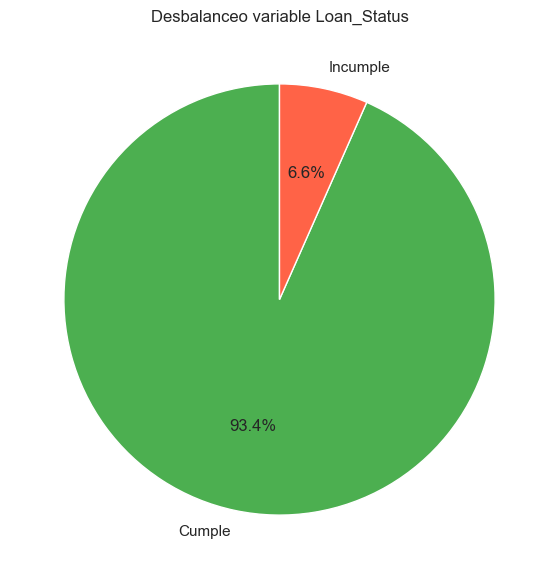

In [30]:
import matplotlib.pyplot as plt

# Contamos los valores de 'loan_status' y calculamos el porcentaje
loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100

# Mapeamos los valores 1 y 0 a las etiquetas 'cumple' e 'incumple'
labels = ['Cumple' if label == 1 else 'Incumple' for label in loan_status_counts.index]

# Creamos el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(loan_status_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF6347'])
plt.title('Desbalanceo variable Loan_Status')
plt.show()


Balanceando exactamente 1 a 1:
![image.png](attachment:image.png)

## Estrategias a realizar.

In [31]:
df["loan_status"].value_counts()

loan_status
1    828560
0     58819
Name: count, dtype: int64

Se evidencia el alto desbalance que hay en el target y que al realizar un balanceo obtenemos un mejor resultado en detectar aquellos clientes que pueden incurrir en un impago(Valor de Recall en label 0) siendo una perdida para el banco. Primero se obtuvieron métricas muy altas debido al balanceo desbalanceo del target ya que el modelo estaba en la gran mayoría de casos prediciendo el label 1 pero al realizar el balanceo de la clase por el método de under-sampling se obtuvieron mejores resultados sin embargo al realizarlo se tienen más datos de prueba que de entrenamiento.

Gracias a la gran cantidad de datos que se tienen en el dataset se puede realizar un undersampling y continuar teniendo un muy buen número de datos.

In [32]:
df.shape

(887379, 39)

In [33]:
columnas_seleccionadas = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
    'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'tot_coll_amt',
    'tot_cur_bal', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
    'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
    'verification_status_Source Verified', 'verification_status_Verified',
    'purpose_credit_card', 'purpose_debt_consolidation',
    'purpose_educational', 'purpose_home_improvement', 'purpose_house',
    'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
    'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
    'purpose_vacation', 'purpose_wedding'
]

X = df[columnas_seleccionadas]
Y= df['loan_status']


##MODELO RNA


In [34]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rus_hot = RandomUnderSampler()

X_under, y_under = rus_hot.fit_resample(X, Y)

print(len(X_under), len(y_under))

117638 117638


In [35]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0, stratify=y_under)

In [36]:
df.shape

(887379, 39)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
arg = X_under.columns.tolist().index("tot_cur_bal")+1
# Elegir las columnas a escalar(No categóricas)
to_scale = X_under.columns.tolist()[:arg]
print(to_scale)

X_under[to_scale] = scaler.fit_transform(X_under[to_scale])

['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'tot_coll_amt', 'tot_cur_bal']


In [38]:
# Temp para luego dividirr
X_train, X_temp, y_train, y_temp = train_test_split(
    X_under,
    y_under,
    test_size=0.30,    # 30% se destina a dividir entre validación y test
    random_state=0,   # Semilla para reproducibilidad
    shuffle=True       # Mezclamos aleatoriamente los datos antes de dividir
)


# 50% de X_temp se destinará a validación y 50% a test.
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,    # De ese 30%, la mitad (15%) para test
    random_state=0,
    shuffle=True
)

# Veamos la proporción real
print("Tamaño de X_train:", X_train.shape, " ->", len(X_train)/len(X))
print("Tamaño de X_val:  ", X_val.shape,   " ->", len(X_val)/len(X))
print("Tamaño de X_test: ", X_test.shape,  " ->", len(X_test)/len(X))


Tamaño de X_train: (82346, 36)  -> 0.0927968770953561
Tamaño de X_val:   (17646, 36)  -> 0.019885528055092583
Tamaño de X_test:  (17646, 36)  -> 0.019885528055092583


In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def build_model(input_dim,
                n_hidden1=128,
                n_hidden2=64,
                n_hidden3=32,
                dropout_rate=0.3,
                l2_reg=0.0,
                learning_rate=0.001):

    model = models.Sequential()

    # Capa oculta 1
    model.add(layers.Dense(n_hidden1,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg),
                           input_shape=(input_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capa oculta 2
    model.add(layers.Dense(n_hidden2,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capa oculta 3
    model.add(layers.Dense(n_hidden3,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capa de salida (para binario)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compilación del modelo
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.AUC(name='auc')])
    return model


model = build_model(input_dim=36,
                    n_hidden1=128,
                    n_hidden2=64,
                    n_hidden3=32,
                    dropout_rate=0.3,
                    learning_rate=0.001)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=6,
                                                     restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping_cb],
                    verbose=1)




Epoch 1/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5969 - auc: 0.6336 - loss: 0.7158 - val_accuracy: 0.6549 - val_auc: 0.7143 - val_loss: 0.6201
Epoch 2/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6607 - auc: 0.7119 - loss: 0.6210 - val_accuracy: 0.6779 - val_auc: 0.7411 - val_loss: 0.5983
Epoch 3/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6792 - auc: 0.7362 - loss: 0.6029 - val_accuracy: 0.6832 - val_auc: 0.7474 - val_loss: 0.5923
Epoch 4/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6797 - auc: 0.7389 - loss: 0.6000 - val_accuracy: 0.6829 - val_auc: 0.7512 - val_loss: 0.5887
Epoch 5/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6889 - auc: 0.7500 - loss: 0.5904 - val_accuracy: 0.6899 - val_auc: 0.7558 - val_loss: 0.5850
Epoch 6/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6919 - auc: 0.7526 - loss: 0.5883 - val_accuracy: 0.6904 - val_auc: 0.7566 - val_loss: 0.5834
Epoch 7/50
1287/1287 ━━━━━━━

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report


results = model.evaluate(X_test, y_test, verbose=0)
print("Loss en test:", results[0])
print("Accuracy en test:", results[1])
print("AUC en test:", results[2])

# Generar Predicciones Probabilísticas
y_pred_prob = model.predict(X_test, batch_size=64, verbose=0)

# Convertir Probabilidades a Etiquetas de Clase (umbral = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

# Generar y Mostrar el Reporte de Clasificación
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred, digits=4))

Loss en test: 0.5728940963745117
Accuracy en test: 0.6960217356681824
AUC en test: 0.7668269276618958

--- Classification Report ---

              precision    recall  f1-score   support

           0     0.6811    0.7242    0.7020      8724
           1     0.7125    0.6685    0.6898      8922

    accuracy                         0.6960     17646
   macro avg     0.6968    0.6963    0.6959     17646
weighted avg     0.6970    0.6960    0.6958     17646



In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,109 (184.02 KB)

 Trainable params: 15,553 (60.75 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 31,108 (121.52 KB)

In [42]:
import numpy as np
from sklearn.metrics import f1_score

# Rango de umbrales con pasos de 0.01
thresholds = np.arange(0, 1.01, 0.001) # Paso de 0.01 (incluye 1.0)
best_threshold = 0
best_f1 = 0

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)  # Basado en el F1-Score
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Mejor umbral: {best_threshold}, Mejor F1-Score: {best_f1:.4f}")


Mejor umbral: 0.352, Mejor F1-Score: 0.7179


In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report


results = model.evaluate(X_test, y_test, verbose=0)
print("Loss en test:", results[0])
print("Accuracy en test:", results[1])
print("AUC en test:", results[2])

# Generar Predicciones Probabilísticas
y_pred_prob = model.predict(X_test, batch_size=64, verbose=0)

# Convertir Probabilidades a Etiquetas de Clase (umbral = 0.5)
y_pred = (y_pred_prob >= 0.372).astype(int)

# Generar y Mostrar el Reporte de Clasificación
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred, digits=4))

Loss en test: 0.5728940963745117
Accuracy en test: 0.6960217356681824
AUC en test: 0.7668269276618958

--- Classification Report ---

              precision    recall  f1-score   support

           0     0.7357    0.5413    0.6237      8724
           1     0.6436    0.8099    0.7172      8922

    accuracy                         0.6771     17646
   macro avg     0.6897    0.6756    0.6705     17646
weighted avg     0.6891    0.6771    0.6710     17646



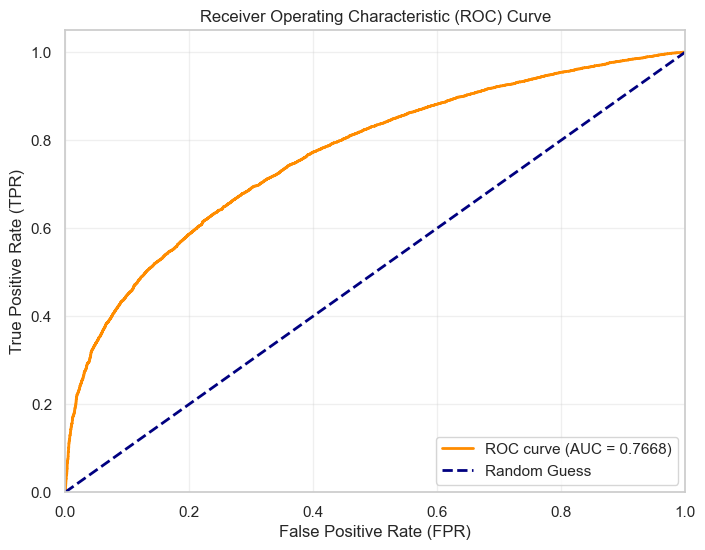

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular las tasas FPR, TPR y el umbral
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


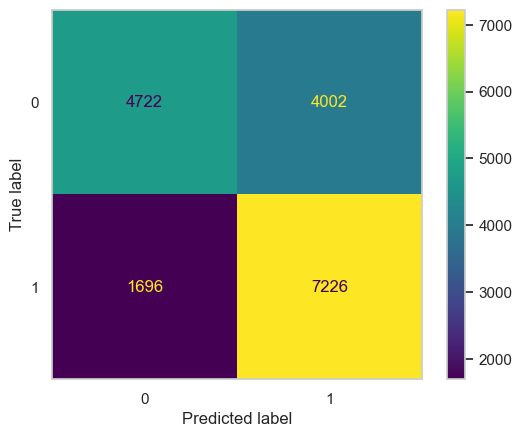

In [57]:
cm_under = confusion_matrix(y_test, y_pred)
disp_under = ConfusionMatrixDisplay(confusion_matrix=cm_under)
disp_under.plot()

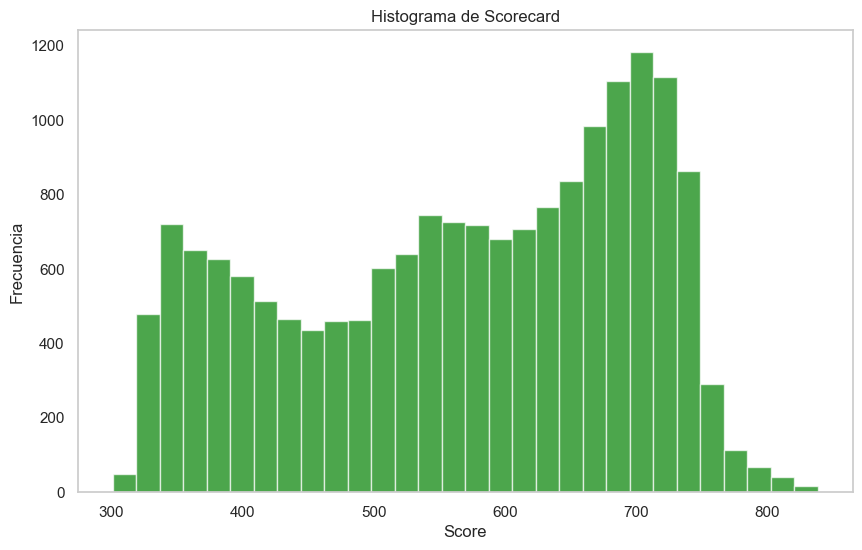

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Crear scorecard_scale
scorecard_scale = min_score + (max_score - min_score) * (1 - y_pred_prob.flatten())

# Crear el histograma de scorecard_scale
plt.figure(figsize=(10, 6))

# Histograma de scorecard_scale
plt.hist(scorecard_scale, bins=30, alpha=0.7, color='green')

# Añadir etiquetas y título
plt.title('Histograma de Scorecard')
plt.xlabel('Score')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()



In [59]:
import numpy as np

# Si es una lista o un array
max_val = max(scorecard_scale)
min_val = min(scorecard_scale)
mean_val = np.mean(scorecard_scale)

print(f"Máximo: {max_val}, Mínimo: {min_val}, Media: {mean_val}")


Máximo: 838.0487060546875, Mínimo: 301.1918029785156, Media: 568.0228271484375


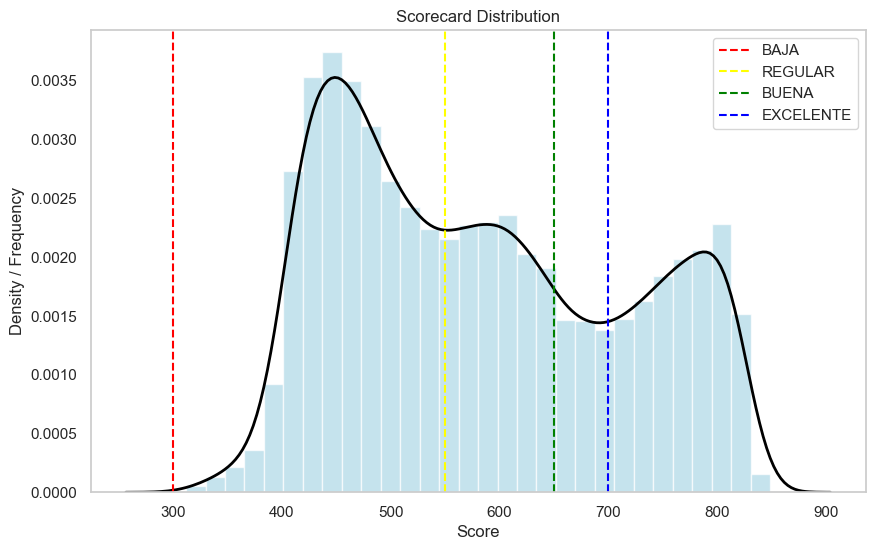

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create scorecard_scale
scorecard_scale = min_score + (max_score - min_score) * y_pred_prob.flatten()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(scorecard_scale, bins=30, alpha=0.7, color='#ADD8E6', density=True)

# Add density plot
sns.kdeplot(scorecard_scale, color='black', linewidth=2)

# Add classification boundary lines
plt.axvline(x=300, color='red', linestyle='--', label='BAJA')
plt.axvline(x=550, color='yellow', linestyle='--', label='REGULAR')
plt.axvline(x=650, color='green', linestyle='--', label='BUENA')
plt.axvline(x=700, color='blue', linestyle='--', label='EXCELENTE')

# Add labels and title
plt.title('Scorecard Distribution')
plt.xlabel('Score')
plt.ylabel('Density / Frequency')
plt.legend()

# Show the plot
plt.show()



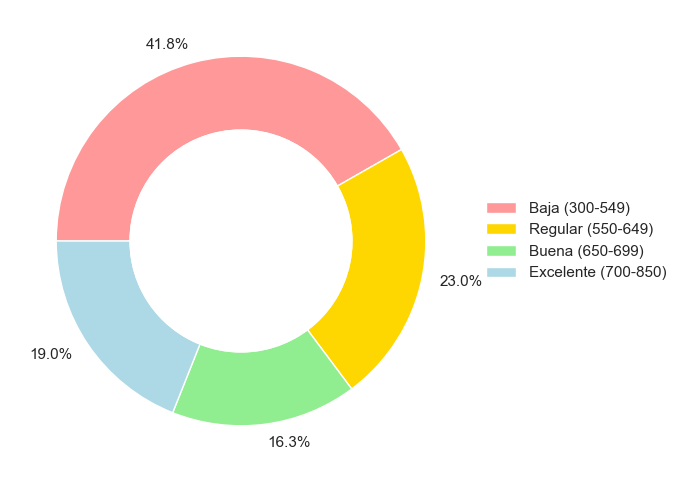

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Crear el scorecard_scale
scorecard_scale = min_score + (max_score - min_score) * (1 - y_pred_prob.flatten())

# Definir los intervalos y sus límites
intervals = {
    'Baja (300-549)': (scorecard_scale >= 300) & (scorecard_scale < 550),
    'Regular (550-649)': (scorecard_scale >= 550) & (scorecard_scale < 650),
    'Buena (650-699)': (scorecard_scale >= 650) & (scorecard_scale < 700),
    'Excelente (700-850)': (scorecard_scale >= 700)
}

# Calcular los porcentajes
percentages = [np.sum(condition) / len(scorecard_scale) * 100 for condition in intervals.values()]
colors = ['#FF9999', '#FFD700', '#90EE90', '#ADD8E6']  # Colores atractivos
labels = [f"{perc:.1f}%" for perc in percentages]  # Mostrar porcentajes en las secciones

# Crear el gráfico de media luna
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts = ax.pie(
    percentages,
    labels=labels,  # Etiquetas con porcentajes
    startangle=180,
    counterclock=False,
    colors=colors,
    wedgeprops={'width': 0.4}  # Controlar el grosor de las secciones
)

# Dibujar solo la mitad superior
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))  # Fondo blanco para eliminar la parte inferior

# Añadir leyendas fuera del gráfico
ax.legend(
    wedges,
    intervals.keys(),  # Etiquetas de intervalos
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Mostrar el gráfico
plt.show()



In [51]:
## guardar el modelo con la escala correcta para el score

import pickle

class ScorecardModel:
    def __init__(self, base_model, min_score=300, max_score=850):
        self.base_model = base_model
        self.min_score = min_score
        self.max_score = max_score

    def predict(self, X):
        # Generar probabilidades con el modelo base
        probabilities = self.base_model.predict(X)
        # Escalar a la escala del scorecard
        scores = self.min_score + (self.max_score - self.min_score) * probabilities
        return scores

    def evaluate(self, X, y):
        return self.base_model.evaluate(X, y)

    def save(self, file_path):
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)


In [52]:
# Envolver el modelo base en la clase personalizada
min_score = 300
max_score = 850
scorecard_model = ScorecardModel(model, min_score=min_score, max_score=max_score)

# Guardar el modelo con la transformación integrada
with open('scorecard_model.pkl', 'wb') as file:
    pickle.dump(scorecard_model, file)


In [53]:
# Cargar el modelo
with open('scorecard_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Generar predicciones escaladas directamente
X_test_example = X_test[:5]  # Usar un subconjunto para el ejemplo
predicted_scores = loaded_model.predict(X_test_example)

print("\n--- Scores del Scorecard ---\n")
print(predicted_scores)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

--- Scores del Scorecard ---

[[449.9779 ]
 [479.40402]
 [417.17572]
 [419.71124]
 [465.19513]]
